# Supervised Learning
Supervised learning is a type of machine learning where the model is trained using labeled data.

***Key Characteristics:***
- **Labeled Data:** Requires a dataset with input-output pairs (e.g., X as features and Y as labels).
- **Learning Objective:** Minimize the error between predicted outputs and actual labels.
- **Output Types:**
    - *Regression:* Predict continuous values (e.g., house prices).
    - *Classification:* Predict discrete labels (e.g., spam or not spam).

***Common Algorithms:***
- *Regression:* Linear Regression, Polynomial Regression
- *Classification:* Logistic Regression, Support Vector Machines (SVM), Decision Trees, Random Forest, Neural Networks

***Applications:***
- Image Recognition
- Sentiment Analysis
- Fraud Detection
- Medical Diagnosis, etc.

## Iris Species Dataset (Classification)
Today we will use the [Iris Species](https://www.kaggle.com/datasets/uciml/iris) dataset. It includes three iris species with 50 samples each as well as some properties about each flower.

**The columns in X (iris.data):**
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm

**The columns in y (iris.target):**
- Species *(Iris-setosa, Iris-versicolor, Iris-virginica)*

In [ ]:
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

X = iris.data
y = iris.target
print(f'X shape: {X.shape} y shape: {y.shape}')

X shape: (150, 4) y shape: (150,)


## Split the data into training and test sets
We need to test the generalization of our model. Thus, we use a set only for training, and test the model on unseen data.

In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test
print(f'X_train shape: {X_train.shape} y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape} y_test shape: {y_test.shape}')

X_train shape: (120, 4) y_train shape: (120,)
X_test shape: (30, 4) y_test shape: (30,)


## Logistic Regression model
Logistic Regression is a statistical method for analyzing datasets in which there are one or more independent variables that determine an outcome. The outcome is measured with a dichotomous variable (in which there are only two possible outcomes).

**Mathematical Representation:**
The logistic function (sigmoid) is defined as:
$$\sigma(z) = \frac{1}{1 + e^{-z}}$$
where \(z\) is the linear combination of input features.

**Advantages:**
- Simple and easy to implement.
- Provides probabilities and insights into the importance of features.
- Works well with linearly separable data.

**Disadvantages:**
- Not suitable for complex relationships in data.
- Assumes linearity between the dependent and independent variables.

In [ ]:
# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Make predictions
y_pred = model_lr.predict(X_test)
y_pred

# # You can also predict the probability of each class
# y_pred_proba = model_lr.predict_proba(X_test)
# y_pred_proba

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])


### Evaluation Metrics

#### Accuracy
Accuracy is the ratio of correctly predicted instances to the total instances.
$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$
Where:
- TP: True Positives
- TN: True Negatives
- FP: False Positives
- FN: False Negatives

#### Precision
Precision is the ratio of correctly predicted positive observations to the total predicted positives.
$$\text{Precision} = \frac{TP}{TP + FP} $$

#### Recall
Recall (Sensitivity) is the ratio of correctly predicted positive observations to all observations in the actual class.
$$\text{Recall} = \frac{TP}{TP + FN}$$

#### F1 Score
F1 Score is the weighted average of Precision and Recall. It considers both false positives and false negatives.
$$\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$


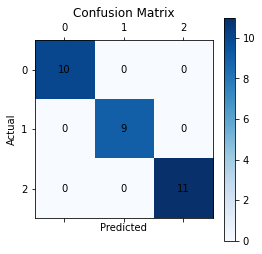

In [ ]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.matshow(cm, cmap=plt.cm.Blues)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Evaluate the model (accuracy, precision, recall, f1-score)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


## Random Forest model
## Random Forest Classifier
Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training and outputting the mode of the classes for classification tasks.

**Mathematical Representation:**
Random Forest combines the predictions of multiple decision trees, each trained on different parts of the same dataset, to improve accuracy and control over-fitting.

**Advantages:**
- Handles large datasets with higher dimensionality.
- Reduces over-fitting by averaging multiple decision trees.
- Provides feature importance, which helps in understanding the dataset.

**Disadvantages:**
- Can be computationally expensive and time-consuming.
- Less interpretable compared to individual decision trees.
- Requires careful tuning of hyperparameters for optimal performance.

In [ ]:
# Train a Random Forest model
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Make predictions
y_pred = model_rf.predict(X_test)

# Evaluate the model (accuracy, precision, recall, f1-score)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


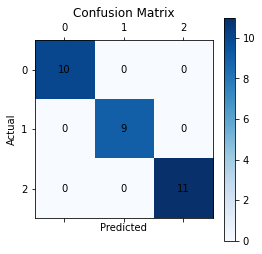

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap=plt.cm.Blues)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Boston Housing Dataset (Regression)

The Boston Housing Dataset consists of price of houses in various places in Boston.

**X Columns:**
- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxides concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per $10,000
- PTRATIO: Pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the
- LSTAT: Percentage of lower status of the population

**y Column:**
- MEDV: Median value of owner-occupied homes in $1000s

In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()

# Load the data into a DataFrame
import pandas as pd

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [ ]:
X = boston.data
y = boston.target
print(f'X shape: {X.shape} y shape: {y.shape}')

X shape: (506, 13) y shape: (506,)


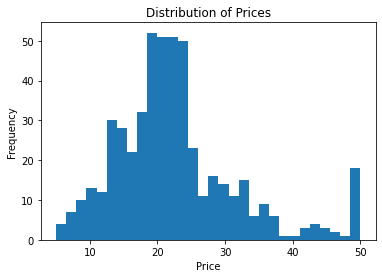

In [ ]:
# Plot the y values
import matplotlib.pyplot as plt

plt.hist(y, bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test
print(f'X_train shape: {X_train.shape} y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape} y_test shape: {y_test.shape}')

X_train shape: (404, 13) y_train shape: (404,)
X_test shape: (102, 13) y_test shape: (102,)


### Linear Regression model
## Linear Regression model
Linear Regression is a statistical method for modeling the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the input variables (X) and the single output variable (y).

**Mathematical Representation:**
The linear regression model is represented as:
$$y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_nX_n + \epsilon$$
where:
- $y$ is the dependent variable.
- $beta_0$ is the intercept.
- $\beta_1, \beta_2, \ldots, \beta_n$ are the coefficients.
- $X_1, X_2, \ldots, X_n$ are the independent variables.
- $\epsilon$ is the error term.

**Advantages:**
- Simple and easy to implement.
- Provides interpretable coefficients that show the importance of each feature.
- Works well with linearly separable data.

**Disadvantages:**
- Assumes a linear relationship between the dependent and independent variables.
- Sensitive to outliers.
- Not suitable for complex relationships in data.

In [ ]:
# Train a Linear Regression model
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Make predictions
y_pred = model_lr.predict(X_test)
y_pred

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

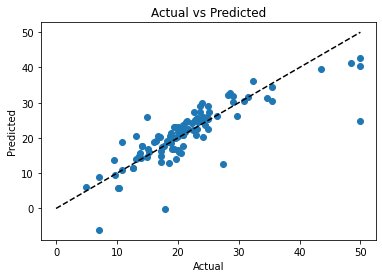

In [ ]:
# Plot the predicted vs actual values, should be a straight line
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

### Evaluation Metrics

#### Mean Squared Error (MSE)
Mean Squared Error (MSE) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.
$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$
A lower MSE indicates a better fit of the model to the data, as it measures the average squared difference between the predicted and actual values.

#### R-squared (R²)
R-squared (R²) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$
An R² value closer to 1 indicates that a larger proportion of the variance in the dependent variable is predictable from the independent variables. An R² value of 1 means the model perfectly explains the variance in the data.

In [ ]:
# Evaluate the model (mean squared error, r2-score)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R2 Score: {r2:.2f}')

Mean Squared Error: 24.29
R2 Score: 0.67


## Random Forest model

In [ ]:
# Train a Random Forest model
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100)
model_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

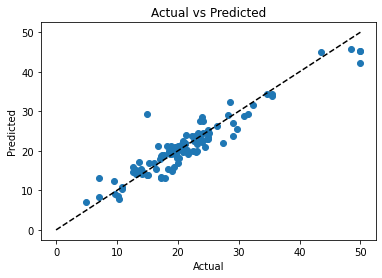

In [ ]:
# Make predictions
y_pred = model_rf.predict(X_test)

# Plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
# Evaluate the model (mean squared error, r2-score)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R2 Score: {r2:.2f}')

Mean Squared Error: 7.95
R2 Score: 0.89


## Home Work
- Apply other Unsupervised ML Algorithms (e.g. Decision Tree, SVM etc.) for both *classification* and *regression* problem.
- Participate in these data science competetions in Kaggle:
    - [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic) *(classification)*
    - [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques) *(regression)*